In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

sys.path.append('../../modules')

# Imports the python definition of f(x) for problem 1.

from problem_function import f

In [5]:
from metaheuristics import taboo_search

In [16]:
# Graph the results of one full GA run

def plot_taboo_search_metaheuristic(f, xrange, results, print_data=False):
    xs = np.linspace(xrange[0], xrange[1], 2*(xrange[1]-xrange[0]))
    ys = np.array([f(i) for i in xs])
    
    midpoint = (int(abs(xs[-1]-xs[0])/2), int(abs(ys[-1]-ys[0])/2))
    
    data = results[0]
    data_length = len(data)
    solution = results[1]
    
    # MatPlotLib
    
    # Plot the problem line
    plt.title("Problem line (only)")
    plt.plot(xs, ys, '-g', label="f(x)")
    plt.legend(framealpha=0.4)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    
    xplots = []
    yplots = []
    
    # Get plotting data
    if (print_data == True):
        print("Plot data (2DP)\n_____________________________________\nX")
    for i in range(data_length):
        val = data[i]
        xplots.append(val)
        yplots.append(f(val))
        if (print_data == True):
            print(round(val, 2))
    
    # Plot best results against problem line
    plt.title("Results against problem line")
    line = plt.plot(xs, ys, '-g', label="f(x)")
    plt.plot(xplots, yplots, "o", color="b", label="Solution")
    
    # Annotate first and last plots
    plt.annotate(s="First s", xy=(xplots[0], yplots[0]), xytext=(midpoint[0], midpoint[1]+170), arrowprops=dict(arrowstyle='->'))
    plt.annotate(s="Last s", xy=(xplots[-1], yplots[-1]), xytext=(midpoint[0], midpoint[1]+30), arrowprops=dict(arrowstyle='->'))
    
    plt.legend(framealpha=0.4)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()

In [8]:
s0 = 120
def stop_function(i, s, viable_neighbours, max_i):
    return (i != 0 and (max_i < i or viable_neighbours == 0))
taboo_memory = 5
def get_neighbourhood(s0, step_size):
    return [round(s0 - step_size, 2), round(s0 + step_size, 2)]
max_i = 300
step_size = 0.1

results = taboo_search(f, s0, stop_function, taboo_memory, get_neighbourhood, True, stop_args={"max_i": max_i}, neighbourhood_args={"step_size": step_size})

Iteration: 1,	Current solution: 119.9,	Taboo list: [120, 119.9]
Iteration: 2,	Current solution: 119.8,	Taboo list: [120, 119.9, 119.8]
Iteration: 3,	Current solution: 119.7,	Taboo list: [120, 119.9, 119.8, 119.7]
Iteration: 4,	Current solution: 119.6,	Taboo list: [120, 119.9, 119.8, 119.7, 119.6]
Iteration: 5,	Current solution: 119.5,	Taboo list: [119.9, 119.8, 119.7, 119.6, 119.5]
Iteration: 6,	Current solution: 119.4,	Taboo list: [119.8, 119.7, 119.6, 119.5, 119.4]
Iteration: 7,	Current solution: 119.3,	Taboo list: [119.7, 119.6, 119.5, 119.4, 119.3]
Iteration: 8,	Current solution: 119.2,	Taboo list: [119.6, 119.5, 119.4, 119.3, 119.2]
Iteration: 9,	Current solution: 119.1,	Taboo list: [119.5, 119.4, 119.3, 119.2, 119.1]
Iteration: 10,	Current solution: 119.0,	Taboo list: [119.4, 119.3, 119.2, 119.1, 119.0]
Iteration: 11,	Current solution: 118.9,	Taboo list: [119.3, 119.2, 119.1, 119.0, 118.9]
Iteration: 12,	Current solution: 118.8,	Taboo list: [119.2, 119.1, 119.0, 118.9, 118.8]
Ite

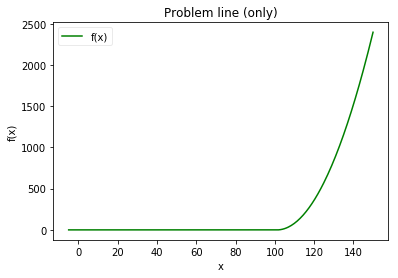

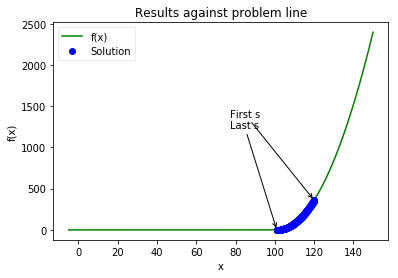

In [17]:
plot_taboo_search_metaheuristic(f, (-5, 150), results)

In [18]:
# Imports my plotting module
import batch_plotting as batch_plt

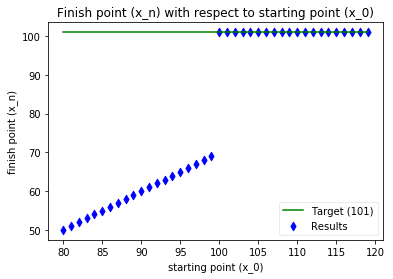

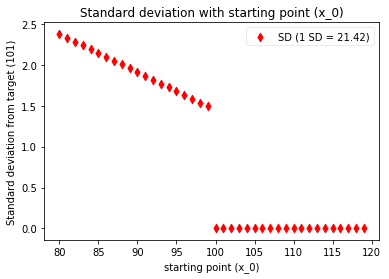

In [21]:
# Batch test taboo search with different starting points
starting_point_results = []
for start_x in range(80, 120):
    result = taboo_search(f, start_x, stop_function, taboo_memory, get_neighbourhood, False, stop_args={"max_i": max_i}, neighbourhood_args={"step_size": step_size})
    starting_point_results.append({"x": start_x, "y": result[1]})
batch_plt.plot_2d_batch_accuracy("finish point (x_n)", "starting point (x_0)", 101, starting_point_results)

Starting at 80


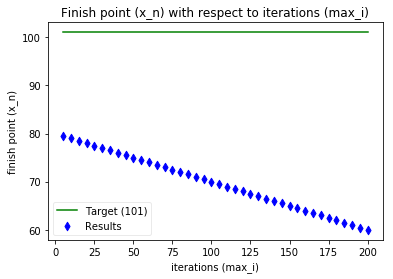

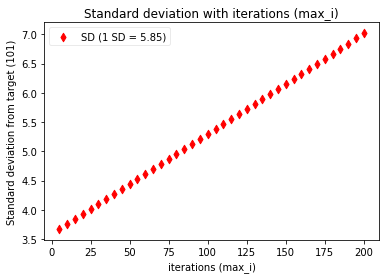

Starting at 101


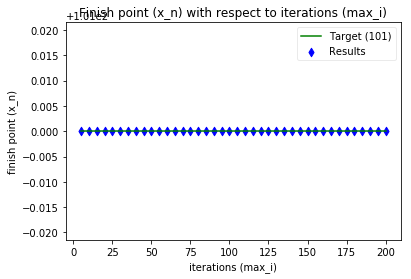

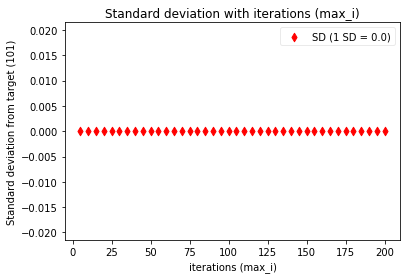

Starting at 120


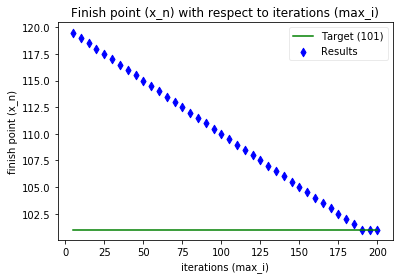

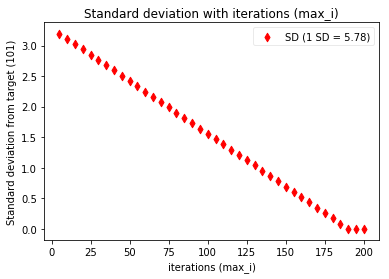

In [23]:
# Batch test gradient descent with different max_iterations (over 3 starting points)
starting_points = [80, 101, 120]
for starting_point in starting_points:
    iteration_results = []
    for max_i in range(40):
        max_iter = (max_i+1)*5
        result = taboo_search(f, starting_point, stop_function, taboo_memory, get_neighbourhood, False, stop_args={"max_i": max_iter}, neighbourhood_args={"step_size": step_size})
        iteration_results.append({"x": max_iter, "y": result[1]})

    print("Starting at {}".format(starting_point))
    batch_plt.plot_2d_batch_accuracy("finish point (x_n)", "iterations (max_i)", 101, iteration_results)